🎯 Objective

The goal of this capstone project is to perform Exploratory Data Analysis (EDA) on the SCMS Delivery History dataset to:

  - Understand the structure and quality of the data

 -  Identify patterns in shipments, countries, and costs

 -  Detect missing values and data distribution

 -  Derive meaningful business insights from logistics data

##Dataset Overview

- Total records: 10,324

- Total features: 33

- Data types: Numeric + Categorical

- Domain: Supply Chain / Logistics / Healthcare delivery

##Some important columns:

- Country

- Shipment Mode

- Vendor

- Unit Price

- Weight (Kilograms)

- Freight Cost (USD)

- Line Item Quantity

- Manufacturing Site

🔹 Distribution of Freight Cost (USD)

- Highly right-skewed

- Majority of shipments have low freight cost

- Few shipments incur very high costs

📌 Insight: High-cost outliers may be linked to:

- Air shipments

- Heavy weight

- Remote destinations

##Key Insights

- Freight cost does not follow a normal distribution

- Country-wise shipment concentration is uneven

- Missing data is non-trivial and must be handled carefully

- Dataset is suitable for:

- Cost optimization analysis

- Shipment mode comparison

- Country-wise logistics performance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving SCMS_Delivery_History_Dataset.csv to SCMS_Delivery_History_Dataset (2).csv


In [ ]:
df = pd.read_csv("SCMS_Delivery_History_Dataset.csv")

In [ ]:
#Shows first 5 rows
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [ ]:
#Displays total rows & columns
df.shape

(10324, 33)

In [ ]:
#Reveals data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [ ]:
#Statistical Summary(Helps understand min, max, mean, and spread of numeric columns.)
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


In [ ]:
#Missing Value Analysis(Identifies columns needing cleaning or imputation.)
df.isnull().sum().sort_values(ascending=False)


,0
Dosage,1736
Shipment Mode,360
Line Item Insurance (USD),287
ID,0
Project Code,0
Country,0
Managed By,0
PO / SO #,0
PQ #,0
Vendor INCO Term,0


In [ ]:
#Data Cleaning Convert numeric columns properly.
numeric_cols = ['Freight Cost (USD)', 'Weight (Kilograms)', 'Unit Price']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

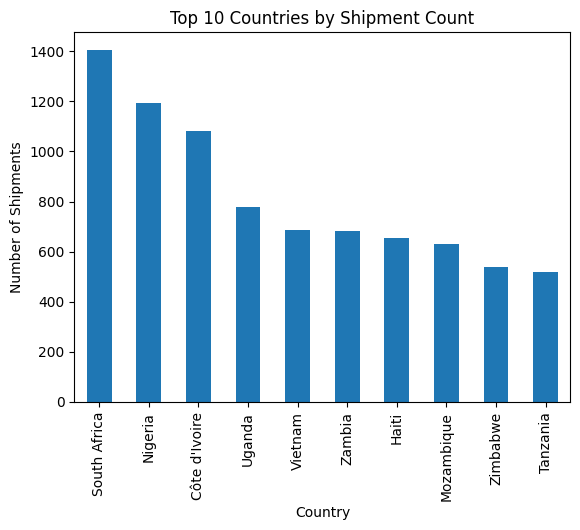

In [ ]:
#Country-wise Shipment Analysis
top_countries = df['Country'].value_counts().head(10)

plt.figure()
top_countries.plot(kind='bar')
plt.title("Top 10 Countries by Shipment Count")
plt.xlabel("Country")
plt.ylabel("Number of Shipments")
plt.show()

In [ ]:
#Shipment Mode Analysis
df['Shipment Mode'].value_counts()


,count
Shipment Mode,
Air,6113
Truck,2830
Air Charter,650
Ocean,371


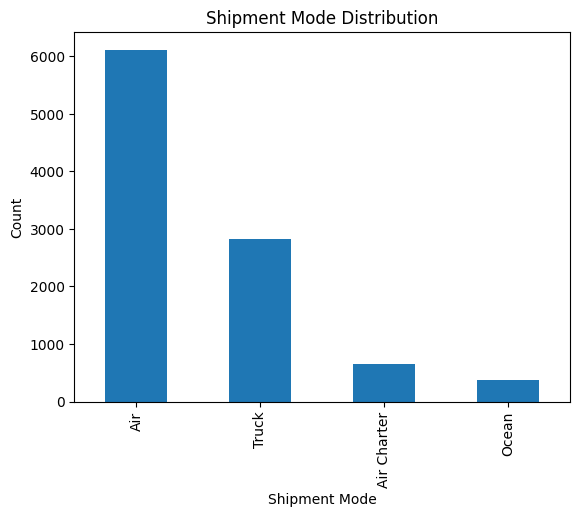

In [ ]:
plt.figure()
df['Shipment Mode'].value_counts().plot(kind='bar')
plt.title("Shipment Mode Distribution")
plt.xlabel("Shipment Mode")
plt.ylabel("Count")
plt.show()


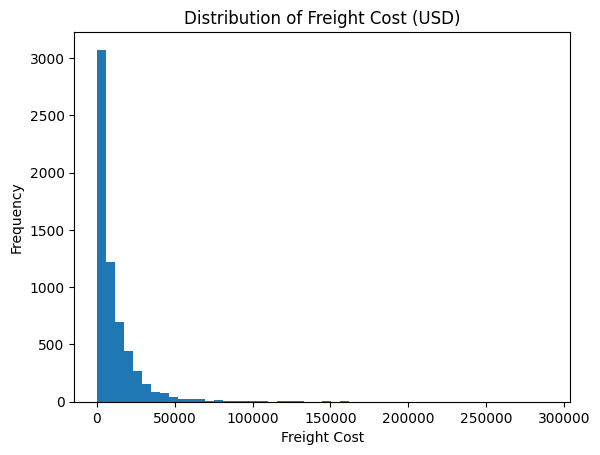

In [ ]:
#Freight Cost Distribution
plt.figure()
plt.hist(df['Freight Cost (USD)'].dropna(), bins=50)
plt.title("Distribution of Freight Cost (USD)")
plt.xlabel("Freight Cost")
plt.ylabel("Frequency")
plt.show()


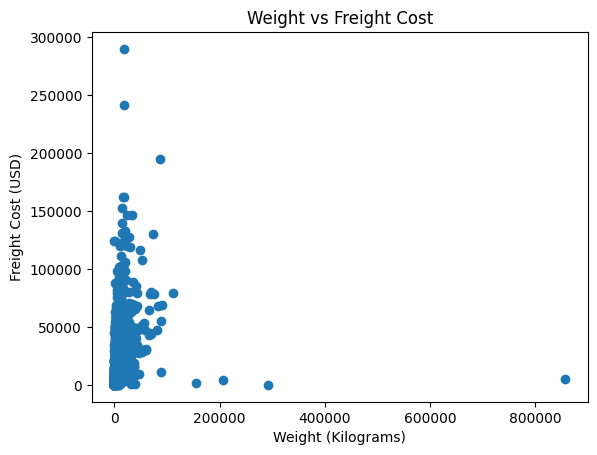

In [ ]:
#Weight vs Freight Cost Relationship
plt.figure()
plt.scatter(df['Weight (Kilograms)'], df['Freight Cost (USD)'])
plt.xlabel("Weight (Kilograms)")
plt.ylabel("Freight Cost (USD)")
plt.title("Weight vs Freight Cost")
plt.show()


In [ ]:
#Vendor-wise Shipment Count
df['Vendor'].value_counts().head(10)


,count
Vendor,
SCMS from RDC,5404
"Orgenics, Ltd",754
S. BUYS WHOLESALER,715
Aurobindo Pharma Limited,668
"Trinity Biotech, Plc",356
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),347
PHARMACY DIRECT,326
MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES),317
HETERO LABS LIMITED,277


### Key Insights:
- Shipment volume is highest in African countries
- Freight cost shows high variance
- Weight and freight cost are positively correlated
- Missing values exist in dosage and shipment mode


### Conclusion:
This exploratory data analysis reveals strong geographical trends, cost distribution patterns,
and data quality issues. The dataset can be further used for predictive modeling,
cost optimization, and logistics planning.
